### Let's get started!
Import some required packages & also print out the paths of the files for convenience

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# pip install sweetviz

  Obtaining dependency information for sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 70.2 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


# Loading the Test and Train samples

X_train & X_test contains pandas Datframe for train & test samples

In [3]:
X_train = pd.read_csv("/kaggle/input/titanic/train.csv")
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X_test = pd.read_csv("/kaggle/input/titanic/test.csv")
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Let's Visualize our data in a nice fashion

We will use sweetviz & IFrame (from IPython module)

In [5]:
# import sweetviz as sv
# data_report = sv.analyze(X_train)
# data_report.show_html('my_analysis.html')

                                             |          | [  0%]   00:00 -> (? left)

Report my_analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
# from IPython.display import IFrame
# IFrame(src = 'my_analysis.html', width = 1000, height = 800)

### Effect of Gender
Let's see the effect of Sex on the survival rate of the passengers on the Titanic

In [7]:
male = X_train.loc[X_train.Sex == 'male']["Survived"]
survived = sum(male) / len(male)

print("The percentage of surviving men are:", survived)

female = X_train.loc[X_train.Sex == 'female']["Survived"]
survived = sum(female) / len(female)

print("The percentage of surviving women is:", survived)


The percentage of surviving men are: 0.18890814558058924
The percentage of surviving women is: 0.7420382165605095


# Let's Visalize the Data

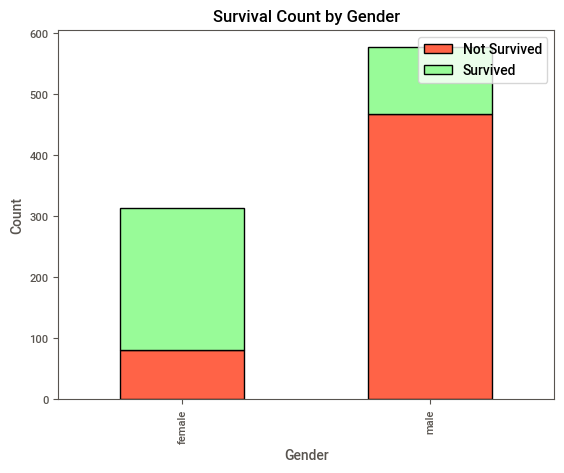

In [8]:
# survived_by_gender = X_train.groupby(['Sex', 'Survived']).size().unstack()
# survived_by_gender.plot(kind='bar', stacked=True, color=['#FF6347', '#98FB98'], edgecolor='black')

# plt.title('Survival Count by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Count')

# plt.legend(['Not Survived', 'Survived'], loc='upper right')
# plt.show()

It's apparent in this case that gender is a huge determining factor on whether a person survives or not.


### Make data usable

To make data usable for further analysis we will convert them into one hot encoding format

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Missing values

We are going to fill up the missing "Age" values..

In [10]:
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
X_test['Age'].fillna(X_train['Age'].median(), inplace=True)

In [11]:
fare_bins = [0, 26, 60, float('inf')]
fare_labels = ['low', 'mid', 'high']
age_bins = [0, 20, 40, float('inf')]
age_labels = ['young', 'mid', 'old']

X_train['Fare_Range'] = pd.cut(X_train['Fare'], bins = fare_bins, labels = fare_labels, include_lowest = True, right=False)
X_train['CabinCat'] = X_train['Cabin'].isna().astype(bool)
X_train['Age_range'] = pd.cut(X_train['Age'], bins = age_bins, labels = age_labels)

X_test['Fare_Range'] = pd.cut(X_test['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True, right=False)
X_test['CabinCat'] = X_test['Cabin'].isna().astype(bool)
X_test['Age_range'] = pd.cut(X_test['Age'], bins = age_bins, labels = age_labels)

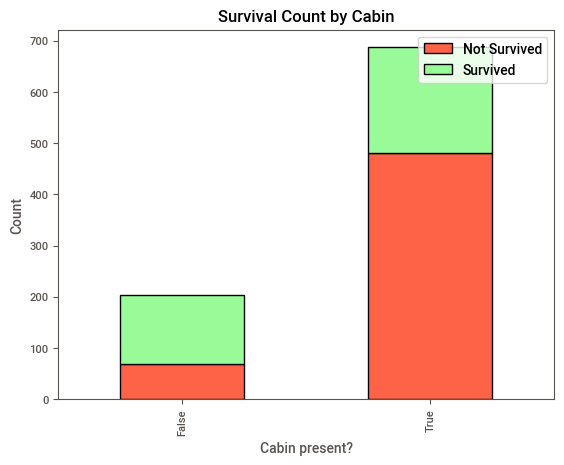

In [12]:
# survived_by_cabin = X_train.groupby(['CabinCat', 'Survived']).size().unstack()
# survived_by_cabin.plot(kind='bar', stacked=True, color=['#FF6347', '#98FB98'], edgecolor='black')

# plt.title('Survival Count by Cabin')
# plt.xlabel('Cabin present?')
# plt.ylabel('Count')

# plt.legend(['Not Survived', 'Survived'], loc='upper right')
# plt.show()

### Let's see how the tables look now

In [13]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Range,CabinCat,Age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,low,True,mid
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,high,False,mid
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,low,True,mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mid,False,mid
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,low,True,mid


In [14]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Range,CabinCat,Age_range
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,low,True,mid
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,low,True,old
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,low,True,old
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,low,True,mid
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,low,True,mid


### Let's use Forest model for predictions

Now let's use RandomForestClassifier model which uses a forest of decision trees for making predictions on our training data

In [15]:
Y_train = X_train["Survived"]

features = ["Pclass", "Sex", "Parch", "Fare_Range"]
X1_train = pd.get_dummies(X_train[features])
X1_test = pd.get_dummies(X_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X1_train, Y_train)

predictions = model.predict(X1_test)

output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Done!")

Done!


### That's it for now, I will keep improving this code..

Thanks for all the support from you guys, I'm trying my best to improve and Good luck to you all :)